<a href="https://colab.research.google.com/github/marjcuerdo/EmotionVoiceGame-TherapyJourney/blob/main/PredictEmotionVoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API to predict emotion from sound sample
Takes audio (.wav) file as input, returns string label of predicted emotion

In [ ]:
!pip install flask-ngrok

#download pretrained model
!wget https://archive.org/download/voice_202103/voice.pkl

--2021-03-10 07:55:41--  https://archive.org/download/voice_202103/voice.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801405.us.archive.org/22/items/voice_202103/voice.pkl [following]
--2021-03-10 07:55:41--  https://ia801405.us.archive.org/22/items/voice_202103/voice.pkl
Resolving ia801405.us.archive.org (ia801405.us.archive.org)... 207.241.228.145
Connecting to ia801405.us.archive.org (ia801405.us.archive.org)|207.241.228.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87447575 (83M) [application/octet-stream]
Saving to: ‘voice.pkl’

voice.pkl           100%[===================>]  83.40M  4.76MB/s    in 8.3s    

2021-03-10 07:55:50 (10.0 MB/s) - ‘voice.pkl’ saved [87447575/87447575]



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://aeee736f9072.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [10/Mar/2021 07:58:52] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 07:59:13] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 07:59:24] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:00:15] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:01:04] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:01:23] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:01:38] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:02:25] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:03:22] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:03:34] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:04:32] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:04:47] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:05:01] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:05:37] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:06:04] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 08:06:17] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/20

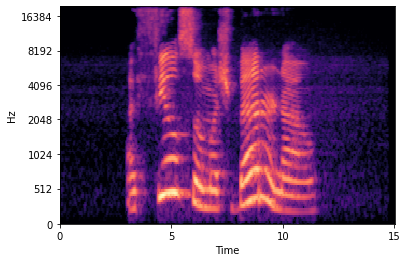

In [ ]:
# import packages for emotion prediction
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import re 
import os
import json
from fastai.vision import *
# import packages to create API
from flask import Flask, request 
from flask_ngrok import run_with_ngrok

app = Flask(__name__) 
run_with_ngrok(app)    
  
@app.route("/",methods=['POST']) 
def predict(): 
  data = request.files['file']
  
  # process just one uploaded audio file
  y, sr = librosa.load(data)
  yt,_=librosa.effects.trim(y)
  y=yt
  mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
  mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
  librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');

  plt.savefig("x.jpg")
  imageName='x.jpg'

  prediction = model_inf.predict(open_image(imageName))
  return str(prediction[0])
    
if __name__ =="__main__":
  model_inf = load_learner(Path(),'voice.pkl')
  app.run()


# Sample structure for API request

In [ ]:
# DO NOT run this cell, for illustration purposes only

import requests

url = "http://4369befbca9e.ngrok.io" # needs to be copy-pasted every time API is launched
fin = open(r'/content/drive/MyDrive/Colab Notebooks/Voice Data/Audio_Speech_Actors_01-24/Actor_01/03-01-06-02-02-01-01.wav', 'rb') # send any .wav file to API
files = {'file': fin}
r = requests.post(url, files=files)

print(r)
print(r.text)